In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # bt fill el null vlaues bs b function 3shan a3rf ahotha f el pipeline msh mn pandas nfs-ha
from sklearn.feature_selection import SelectFromModel,RFE # hn3ml btre2a gdeda el embedded methods # as3ha tany ana s2ltha
from sklearn.compose import ColumnTransformer # 3shan a3ml combine ll pipline bta3 categorical w numerical
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc

In [2]:
import os

os.cpu_count()

16

In [3]:
df=pd.read_csv('final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [6]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

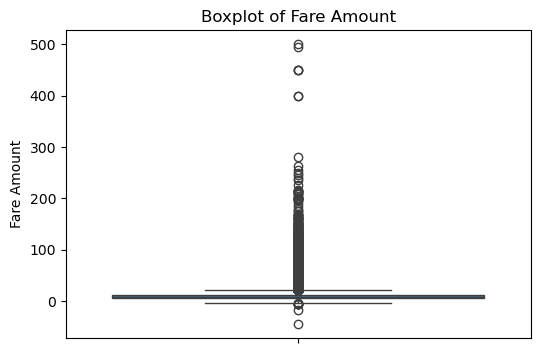

In [7]:
df.duplicated().sum()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=df["fare_amount"])
plt.title("Boxplot of Fare Amount")
plt.ylabel("Fare Amount")
plt.show()

In [8]:
# drop nulls
df=df.dropna()


In [9]:
# remove fare_amount outliers above 270 and below 0
df = df[(df["fare_amount"] >= 0) & (df["fare_amount"] <= 270)]

print("Rows remaining after removing fare_amount outliers:", df.shape[0])

Rows remaining after removing fare_amount outliers: 499966


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000,499966.000000
mean,11.352255,-1.265713,0.696741,-1.265757,0.696675,1.683450,13.511029,15.684181,6.268712,3.041985,2011.739052,385.281845,380.505511,363.846028,363.675915,355.993283,19.452083,0.297163
std,9.770758,0.206940,0.140910,0.205901,0.128997,1.307391,6.511543,8.681091,3.437816,1.949238,1.860852,2419.128078,2428.845318,2425.116438,2428.389266,2428.771421,367.107439,1.804556
min,0.000000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341567,32.173601,17.100801,14.886952,7.147334,1.214664,-0.854711
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523153,34.787419,19.591573,18.347493,10.458088,2.117010,-0.050423
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785607,38.304245,22.214762,22.417357,14.448319,3.890147,2.206777
max,263.250000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [11]:
X_with_coords = df.drop([
    'fare_amount',
    'User ID',
    'User Name',
    'Driver Name',
    'key'
], axis=1)

X_no_coords = df.drop([
    'fare_amount',
    'User ID',
    'User Name',
    'Driver Name',
    'key',
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude'
], axis=1)

y=df['fare_amount']


In [12]:
categorical_cols_no_coordinates=X_no_coords.select_dtypes(include='object').columns.tolist()
numerical_cols_no_coordinates=X_no_coords.select_dtypes(exclude='object').columns.tolist()

categorical_cols_with_coordinates=X_with_coords.select_dtypes(include='object').columns.tolist()
numerical_cols_with_coordinates=X_with_coords.select_dtypes(exclude='object').columns.tolist()


In [13]:
# pipeline

numerical_transformer=Pipeline(steps=[ # mmkn ashel klmt steps 3ade
    ('imputer',SimpleImputer(strategy='median')), # col col y5osh yhslo el fn de fill el null
    ('scaler',StandardScaler())
])
categorical_transformer=Pipeline(steps=[ # mmkn ashel klmt steps 3ade
    ('imputer',SimpleImputer(strategy='most_frequent')), # col col y5osh yhslo el fn de fill el null
    ('encode',OneHotEncoder(handle_unknown='ignore'))
])


In [14]:
preprocessor=ColumnTransformer(transformers=[
    ('categorical', categorical_transformer,categorical_cols_no_coordinates),
    ('numerical', numerical_transformer,numerical_cols_no_coordinates)
])

In [21]:
# pipeline in model building
import lightgbm as lgb


pipelines = {  # 3ndy wahd l kol model
    "LinearRegression": Pipeline(
        steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
    ),
    "RandomForest": Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(n_estimators=50, random_state=42)),
        ]
    ),
    "LightGBM": Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            (
                "regressor",
                lgb.LGBMRegressor(
                    n_estimators=200,  # smaller for speed
                    learning_rate=0.1,
                    n_jobs=9,
                    random_state=42,
                ),
            ),
        ]
    ),
}

In [18]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=3,shuffle=True,random_state=42) # stratify byzbot el t2sema balanced
results={}

Cross-validating LinearRegression without coordinates...
Mean RMSE: 8.2571
Mean MAE: 5.1868


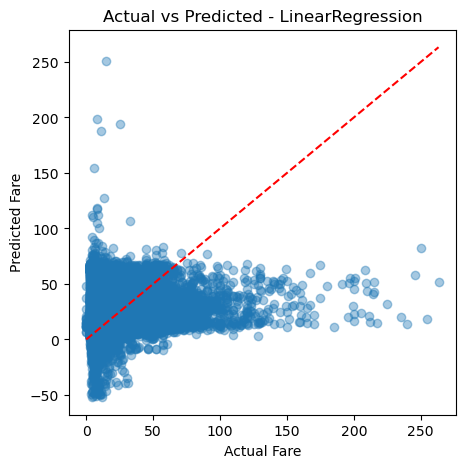

In [27]:
name = "LinearRegression"
pipe = pipelines[name]

print(f"Cross-validating {name} without coordinates...")

rmse_scores = -cross_val_score(
    pipe, X_no_coords, y, cv=cv, scoring="neg_root_mean_squared_error",n_jobs=9
)
mae_scores = -cross_val_score(
    pipe, X_no_coords, y, cv=cv, scoring="neg_mean_absolute_error",n_jobs=9
)

y_pred = cross_val_predict(pipe, X_no_coords, y, cv=cv, n_jobs=9)

mean_rmse = rmse_scores.mean()
mean_mae = mae_scores.mean()

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean MAE: {mean_mae:.4f}")

plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, alpha=0.4)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title(f"Actual vs Predicted - {name}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()

results[name] = {"RMSE": mean_rmse, "MAE": mean_mae}

Cross-validating LightGBM without coordinates...
Mean RMSE: 4.2292
Mean MAE: 1.8083
Time taken: 1.00 min


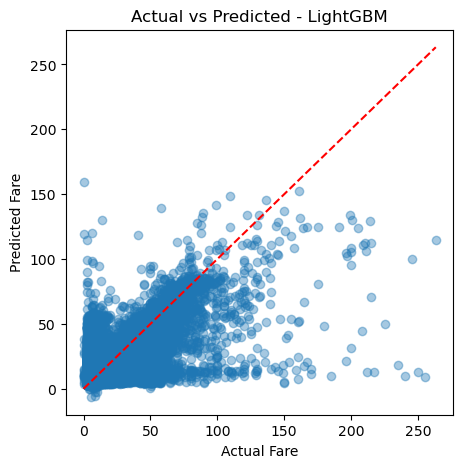

Summary of regression performance (without coordinates):
LightGBM: RMSE=4.2292, MAE=1.8083, Time=1.00 min


In [22]:
import time
name = "LightGBM"
pipe = pipelines[name]

print(f"Cross-validating {name} without coordinates...")

# start timing
start = time.time()

# cross-validation metrics
rmse_scores = -cross_val_score(
    pipe, X_no_coords, y, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=8
)
mae_scores = -cross_val_score(
    pipe, X_no_coords, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=8
)

# cross-validated predictions
y_pred = cross_val_predict(pipe, X_no_coords, y, cv=cv, n_jobs=8)

# final metrics
mean_rmse = rmse_scores.mean()
mean_mae = mae_scores.mean()

# end timing
end = time.time()
elapsed = end - start

print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Mean MAE: {mean_mae:.4f}")
print(f"Time taken: {elapsed/60:.2f} min")

# plot actual vs predicted
plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, alpha=0.4)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title(f"Actual vs Predicted - {name}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.show()

# store results
results[name] = {"RMSE": mean_rmse, "MAE": mean_mae, "Time(min)": elapsed / 60}

# summary
print("Summary of regression performance (without coordinates):")
for name, metrics in results.items():
    print(
        f"{name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, Time={metrics['Time(min)']:.2f} min"
    )

In [20]:
# from sklearn.model_selection import cross_validate
# name = "RandomForest"
# pipe = pipelines[name]

# print(f"Cross-validating {name} without coordinates...")

# # start timing
# import time

# start = time.time()

# # scoring dict for both RMSE and MAE
# scoring = {"rmse": "neg_root_mean_squared_error", "mae": "neg_mean_absolute_error"}

# # cross-validate once
# scores = cross_validate(
#     pipe, X_no_coords, y, cv=cv, scoring=scoring, n_jobs=8, return_estimator=False
# )

# # compute mean metrics
# mean_rmse = -scores["test_rmse"].mean()
# mean_mae = -scores["test_mae"].mean()


# y_pred = cross_val_predict(pipe, X_no_coords, y, cv=cv, n_jobs=8)

# # end timing
# end = time.time()
# elapsed = end - start

# print(f"Mean RMSE: {mean_rmse:.4f}")
# print(f"Mean MAE: {mean_mae:.4f}")
# print(f"Time taken: {elapsed/60:.2f} min")

# # plot actual vs predicted
# plt.figure(figsize=(5, 5))
# plt.scatter(y, y_pred, alpha=0.4)
# plt.xlabel("Actual Fare")
# plt.ylabel("Predicted Fare")
# plt.title(f"Actual vs Predicted - {name}")
# plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
# plt.show()

# # store results
# results[name] = {"RMSE": mean_rmse, "MAE": mean_mae, "Time(min)": elapsed / 60}

# # summary
# print("Summary of regression performance (without coordinates):")
# for name, metrics in results.items():
#     print(
#         f"{name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, Time={metrics['Time(min)']:.2f} min"
#     )

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# parameter distribution
param_dist = {
    "regressor__n_estimators": [50, 100, 200, 300],
    "regressor__max_depth": [3, 5, 7, 10, 15, -1],  # -1 means no limit
    "regressor__num_leaves": [20, 31, 50, 70, 100],
    "regressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "regressor__subsample": [0.6, 0.8, 1.0],
    "regressor__colsample_bytree": [0.6, 0.8, 1.0],
}

lgb_pipeline = pipelines["LightGBM"]

# randomized search with 5-fold CV, 20 iterations
random_search = RandomizedSearchCV(
    estimator=lgb_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,  # use 3 to save time on large dataset
    scoring="neg_root_mean_squared_error",
    n_jobs=9,
    random_state=42,
)

random_search.fit(X_no_coords, y)

print("Best parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best mean RMSE:", -random_search.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1903
[LightGBM] [Info] Number of data points in the train set: 499966, number of used features: 25
[LightGBM] [Info] Start training from score 11.352255
Best parameters (RandomizedSearchCV): {'regressor__subsample': 0.6, 'regressor__num_leaves': 50, 'regressor__n_estimators': 300, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
Best mean RMSE: 4.222304927848726
